# Approximation et extrapolation par moindres carrés

In [1]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

In [2]:
# Chargement des données
data = np.loadtxt("../_static/temperatures.csv", delimiter=",")
year = data[:,0]
temp = data[:,1]
N = len(year)

## Approximation par moindres carrés

$$
\theta = (H^TH)^{-1} H^Ty
$$

In [3]:
# Normalisation des abscisses entre 0 et 1
x = (year-1880) / (2020-1880)

# Données sous forme de vecteur colonne
y = np.transpose(temp)

# Matrice H
H = np.transpose(np.array([ x**0, x**1, x**2 ]))

# Estimation des paramètres θ
HT     = np.transpose(H)
HTH    = np.dot(HT, H)
HTHinv = linalg.pinv(HTH)
HTy    = np.dot(HT, y)
theta  = np.dot(HTHinv, HTy)

# Calcul du polynôme z
z = np.dot(H,theta)

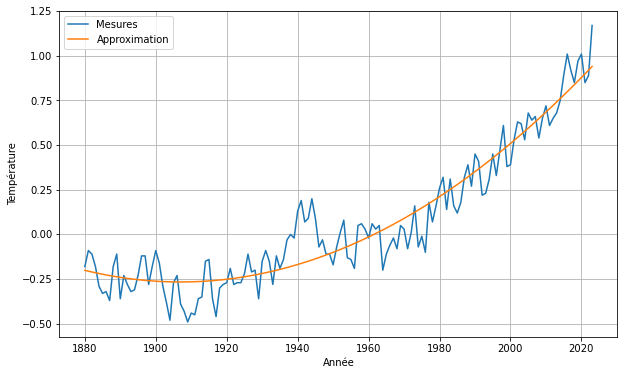

In [4]:
# Affichage
plt.figure(figsize=(10,6))
plt.plot(year, temp, label="Mesures")
plt.plot(year, z, label="Approximation")
plt.xlabel("Année")
plt.ylabel("Température")
plt.legend()
plt.grid()
plt.show()

## Extrapolation

Pour extrapoler la courbe (c'est-à-dire calculer ses valeurs au délà des données),
il suffit de calculer le polynôme sur une autre plage des abscisses,
donc en redéfinissant $H$.

In [5]:
year2 = np.arange(1880,2070)
x = (year2-1880)/(2020-1880)
H = np.transpose(np.array([ x**0, x**1, x**2 ]))
z = np.dot(H,theta)

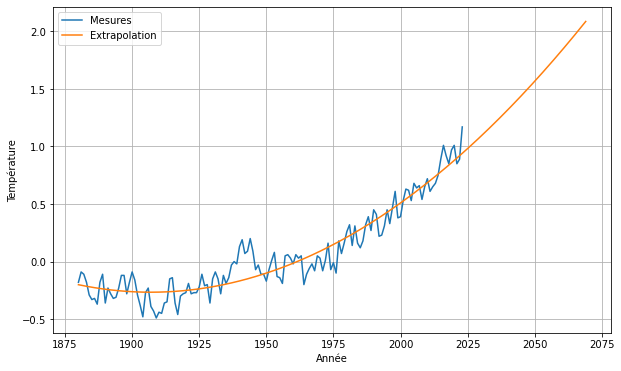

In [6]:
# Affichage
plt.figure(figsize=(10,6))
plt.plot(year, temp, label="Mesures")
plt.plot(year2, z, label="Extrapolation")
plt.xlabel("Année")
plt.ylabel("Température")
plt.legend()
plt.grid()
plt.show()

Si vous avez le moral accroché, vous pouvez connaître les conséquences issues de cette extrapolation sur l'article Wikipedia [Changement climatique](https://fr.wikipedia.org/wiki/Changement_climatique)... 😱

Données :
* [https://data.giss.nasa.gov/gistemp/graphs_v4/](https://data.giss.nasa.gov/gistemp/graphs_v4/)
* [https://climate.nasa.gov/vital-signs/global-temperature/](https://climate.nasa.gov/vital-signs/global-temperature/)